In [19]:
# Abby Sunchen
# 04/01/2025
# Scientific Computing numpy Mini-Project

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import csv

In [21]:
!git clone https://github.com/Eokki112/Coloab.git

fatal: destination path 'Coloab' already exists and is not an empty directory.


In [71]:
%cat Coloab/pi-serial.py

# Abby Sunchen
# 04/01/2025
# Scientific Computing numpy Mini-Project

import numpy as np
import sys
import datetime
import math
import csv

# We define a Python function inside_circle that accepts a single parameter for the number of random points used to calculate π.
def inside_circle(total_count):
    x = np.random.uniform(size=total_count)
    y = np.random.uniform(size=total_count)
# computes their distances from the origin (i.e., radii), and returns how many of those distances were less than or equal to 1.0.
    radii = np.sqrt(x*x + y*y)
    count = len(radii[np.where(radii<=1.0)])
    return count

def write_to_csv(data):
    with open('output.csv', mode='a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(data)

def main(n_samples):
    start_time = datetime.datetime.now()
    counts = inside_circle(n_samples)
    my_pi = 4.0 * counts / n_samples
    end_time = datetime.datetime.now()
    elapsed_time = (end_time - start_time).total_seconds()
   

In [22]:
%cp Coloab/pi-serial.py .

In [23]:
%run pi-serial.py 100

<Figure size 640x480 with 0 Axes>

In [24]:
%run pi-serial.py 1000

In [25]:
%run pi-serial.py 10000

In [26]:
%run pi-serial.py 100000

In [27]:
%run pi-serial.py 1000000

In [28]:
%run pi-serial.py 10000000

In [29]:
data = pd.read_csv('output.csv', header=None, names=['n_of_samples', 'my_pi', 'memory', 'elapsed_time', 'error'])

data.head()

,n_of_samples,my_pi,memory,elapsed_time,error
0,100,3.12000,0.000002,0.002573,0.006873
1,1000,3.18000,0.000022,0.000385,0.012225
2,10000,3.12480,0.000224,0.000845,0.005345
3,100000,3.14080,0.002235,0.012565,0.000252
4,1000000,3.13774,0.022352,0.101382,0.001226


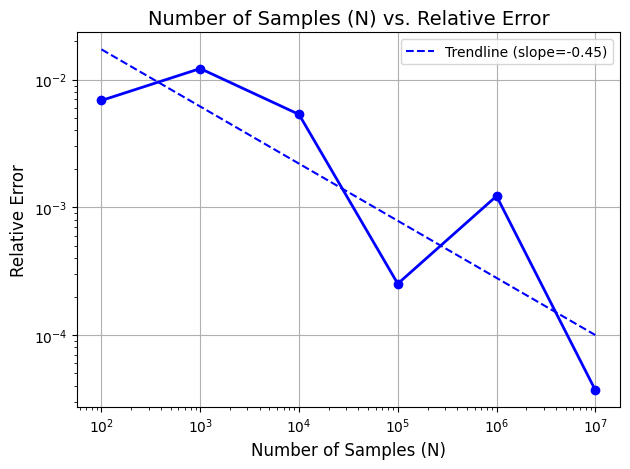

In [76]:
data = pd.DataFrame({
    'n_of_samples': [100, 1000, 10000, 100000, 1000000, 10000000],
    'error': [0.006873, 0.012225, 0.005345, 0.000252, 0.001226, 0.000037]
})

# Log-transform the data
logN = np.log(data['n_of_samples'])
logError = np.log(data['error'])

# Fit a linear regression model (slope)
z = np.polyfit(logN, logError, 1)
p = np.poly1d(z)

# Plot the log-log data
plt.loglog(data['n_of_samples'], data['error'], 'bo-', linewidth=2, markersize=6)

# Plot the trendline
plt.loglog(data['n_of_samples'], np.exp(z[1]) * data['n_of_samples']**z[0], 'b--', label=f'Trendline (slope={z[0]:.2f})')

# Labels and title
plt.xlabel('Number of Samples (N)', fontsize=12)
plt.ylabel('Relative Error', fontsize=12)
plt.title('Number of Samples (N) vs. Relative Error', fontsize=14)
plt.legend()

# Grid
plt.grid(True)

plt.tight_layout()
plt.show()

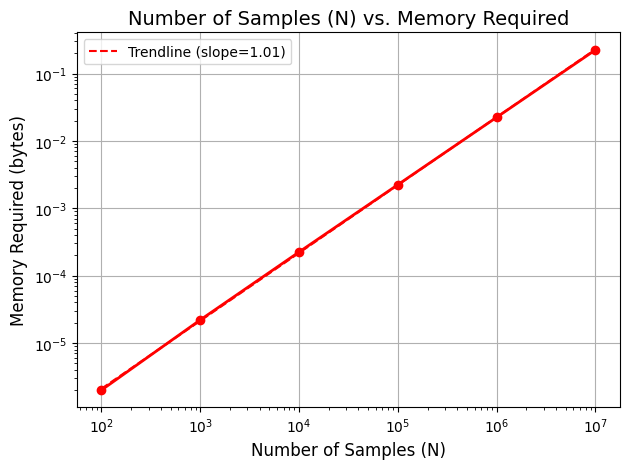

In [73]:
data = pd.DataFrame({
    'n_of_samples': [100, 1000, 10000, 100000, 1000000, 10000000],
    'error': [0.006873, 0.012225, 0.005345, 0.000252, 0.001226, 0.000037],
    # Add the 'memory' column with the actual memory usage data
    'memory': [0.000002, 0.000022, 0.000224, 0.002235, 0.022352, 0.22352]
})

# Log-transform the data
logN = np.log(data['n_of_samples'])
logMemory = np.log(data['memory'])
# Fit a linear regression model (slope)
z = np.polyfit(logN, logMemory, 1)  # Linear fit
p = np.poly1d(z)  # Create a polynomial object for the line

# Plot the log-log data
plt.loglog(data['n_of_samples'], data['memory'], 'ro-', linewidth=2, markersize=6)

# Plot the trendline
plt.loglog(data['n_of_samples'], np.exp(z[1]) * data['n_of_samples']**z[0], 'r--', label=f'Trendline (slope={z[0]:.2f})')

# Labels and title
plt.xlabel('Number of Samples (N)', fontsize=12)
plt.ylabel('Memory Required (bytes)', fontsize=12)
plt.title('Number of Samples (N) vs. Memory Required', fontsize=14)
plt.legend()

# Grid
plt.grid(True)

plt.tight_layout()
plt.show()

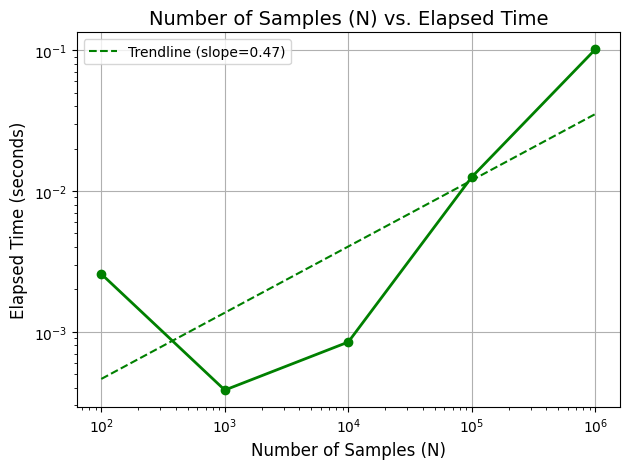

In [74]:
data = pd.DataFrame({
    'n_of_samples': [100, 1000, 10000, 100000, 1000000],
    'elapsed_time': [0.002573, 0.000385, 0.000845, 0.012565, 0.101382]
})

# Log-transform the data
logN = np.log(data['n_of_samples'])
logElapsedTime = np.log(data['elapsed_time'])

# Fit a linear regression model (slope)
z = np.polyfit(logN, logElapsedTime, 1)  # Linear fit
p = np.poly1d(z)  # Create a polynomial object for the line

# Plot the log-log data
plt.loglog(data['n_of_samples'], data['elapsed_time'], 'go-', linewidth=2, markersize=6)

# Plot the trendline
plt.loglog(data['n_of_samples'], np.exp(z[1]) * data['n_of_samples']**z[0], 'g--', label=f'Trendline (slope={z[0]:.2f})')

# Labels and title
plt.xlabel('Number of Samples (N)', fontsize=12)
plt.ylabel('Elapsed Time (seconds)', fontsize=12)
plt.title('Number of Samples (N) vs. Elapsed Time', fontsize=14)
plt.legend()

# Grid
plt.grid(True)

plt.tight_layout()
plt.show()

a. How much more accurate does the estimate of π become as N is increased? When N is increased by a factor of 10, does the error decrease by a factor of 10?

Answer: From the slope of -0.45 in the log-log plot of N vs. Relative Error, we know:

When N increases by a factor of 10, the error decreases by a factor of approximately
10^0.45≈2.82, not 10.

So, the accuracy improves, but not linearly; it improves more slowly than a 1:1 ratio.
****

b. How does the amount of memory required scale as N is increased? Do you expect that it would be linear? How would the slope of the trendline in the log-log plot demonstrate that?
****

Answer:
The slope of the trendline in the log-log plot is 1.01. Slope close to 1 indicates a linear relationship. Memory usage increases proportionally with the number of samples.
****
c. How does the amount of time to calculate scale as N is increased? Do you expect that it would be linear? How would the slope of the trendline in the log-log plot demonstrate that?

Answer: The slope here is 0.47. This means that this is a sublinear scaling. As N increases, the elapsed time increases more slowly than
N. As N increases by a factor of 10, time increases by about 10^0.47≈2.95 instead of a full factor of 10.

If the computation scaled linearly, we would expect the slope of the log-log plot to be around 1. But the observed slope is 0.47, which is significantly less than 1.

Thus, Elapsed time increases sublinearly with N, as reflected in the slope < 1.